In [1]:
from gpstools import viz
from gpstools.parser import *
from gpstools.track import *
from gpstools.referencetrack import *
from gpstools.track_stats import *
from gpstools.trackcomparison import *
import os
from collections import namedtuple

from gpstools.gps_utils import get_dist

In [2]:
# Constructing reference track

track = load_gpx_track('data/bologoe/cooler777_su4.gpx', 'cooler777_su4')

# track.print_stats()

# track.print_activity_segments()

track = track.crop_to_activity_segment_id(0, 'cooler777_su4')
track.print_stats()

#viz.generate_reference_selection_graph([track])

track = track.crop_to_point_idx(3567)
track.print_stats()

cooler_track = track

reference_track = ReferenceTrack(track)

Load track data/bologoe/cooler777_su4.gpx with 8482 points
Track cooler777_su4 is missing subsecond precision, restoring it
Dropping candidate by duration 0
Dropping candidate by duration 4
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 0
Dropping candidate by duration 13
Dropping candidate by duration 4
Dropping candidate by duration 3
Dropping candidate by duration 2
Dropping candidate by duration 0
Dropping candidate by duration 6
Dropping candidate by duration 3
Dropping candidate by duration 4
Dropping candidate by duration 4
Dropping candidate by duration 6
Dropping candidate by duration 2
Dropping candidate by duration 6
Dropping candidate by duration 4
Dropping candidate by duration 5
Dropping candidate by duration 0
Dropping candidate by duration 0
Track cooler777_su4
Start time: 2019-02-03 10:43:00.700000
End time: 2019-02-03 10:49:21
Total time: 0:06:20.300000
Total distance travelled: 10.914 

458
Load racechrono track data/bologoe/fomin_su4.csv with 948 points
Track fomin
Start time: 2019-02-03 13:39:04.029999
End time: 2019-02-03 13:54:48.999000
Total time: 0:15:44.969001
Total distance travelled: 16.321 km
Total average speed: 62.18 kph
Max speed: 160.01 kph
Average speed: 62.21 kph


Dropping candidate by duration 28
Dropping candidate by duration 15
Dropping candidate by duration 19
Activity segment #0:
Start time: 2019-02-03 13:41:59
End time: 2019-02-03 13:54:48.999000
Duration: 0:12:49.999000


Found 1 tracks out of 1 initial tracks
Done dist alignment for track fomin
Found 0 no candidates points
Found 7 dist duplication points
Total 1 tracks
0:
Track fomin
Start time: 2019-02-03 13:41:59
End time: 2019-02-03 13:48:07
Total time: 0:06:08
Total distance travelled: 10.681 km
Total average speed: 104.48 kph
Max speed: 163.73 kph
Average speed: 103.99 kph




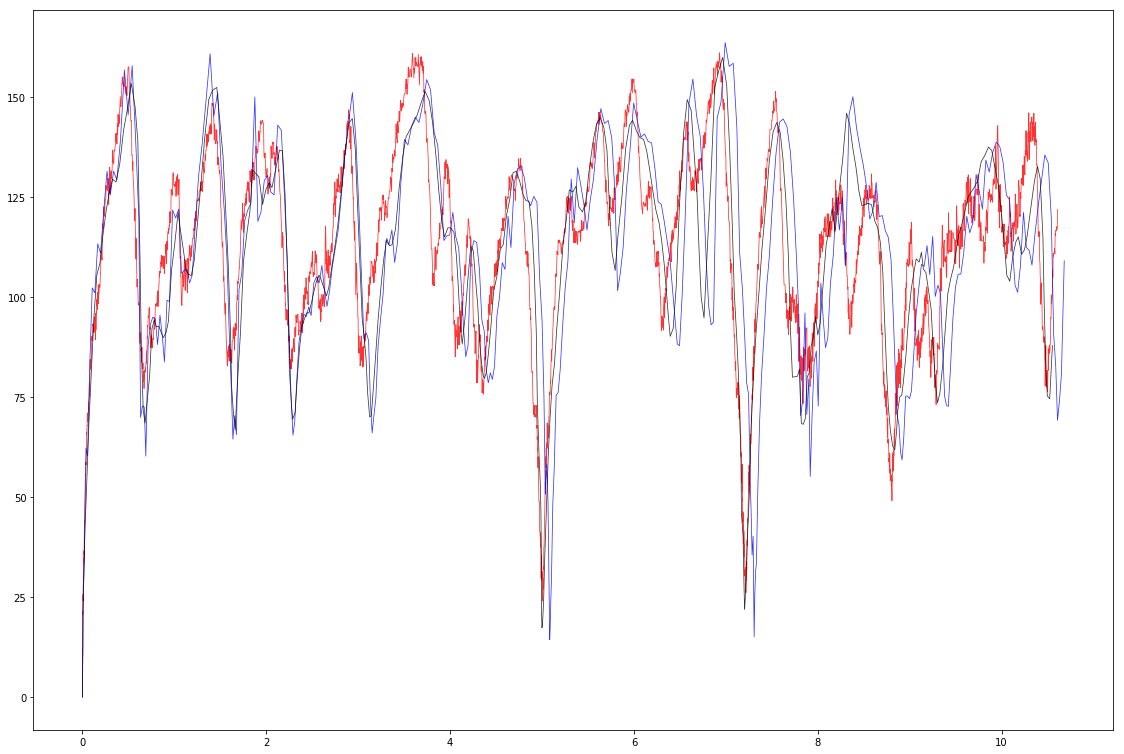

In [3]:
track = load_racechrono_csv_track('data/bologoe/fomin_su4.csv', 'fomin')
track.set_speed_smoothing(1)
track.print_stats()

track.print_activity_segments()

comparison = TrackComparison(reference_track, [track])

print_tracks_stats(comparison.tracks)

viz.plot_distance_speed_graph_for_tracks([cooler_track, comparison.tracks[0], comparison.aligned_tracks[0]])


In [4]:
tracks = load_tracks('data/bologoe/')

tracks = select_activity_segments_by_start_point(reference_track.start_point.get_coords(), tracks)

print_tracks_stats(tracks)

Processing file data/bologoe/maxmir_su2.csv
Looks like not a racebox track, trying racechrono format
423
Load racechrono track data/bologoe/maxmir_su2.csv with 925 points
Processing file data/bologoe/uglov_su6.csv
Looks like not a racebox track, trying racechrono format
415
Load racechrono track data/bologoe/uglov_su6.csv with 1249 points
Processing file data/bologoe/maxmir_su3.csv
Looks like not a racebox track, trying racechrono format
419
Load racechrono track data/bologoe/maxmir_su3.csv with 571 points
Processing file data/bologoe/maxmir_su1.csv
Looks like not a racebox track, trying racechrono format
427
Load racechrono track data/bologoe/maxmir_su1.csv with 2820 points
Processing file data/bologoe/maxmir_su4.csv
Looks like not a racebox track, trying racechrono format
419
Load racechrono track data/bologoe/maxmir_su4.csv with 1142 points
Processing file data/bologoe/sparrow_su1.csv
Looks like not a racebox track, trying racechrono format
419
Load racechrono track data/bologoe/spa

TypeError: get_activity_segments() missing 2 required positional arguments: 'allowed_pause' and 'segment_duration_threshold'

In [5]:
comparison = TrackComparison(reference_track, tracks)

Found 8 tracks out of 22 initial tracks
Done dist alignment for track maxmir_su1
Found 0 no candidates points
Found 3 dist duplication points
Done dist alignment for track maxmir_su4
Found 0 no candidates points
Found 1 dist duplication points
Done dist alignment for track sparrow_su1
Found 0 no candidates points
Found 2355 dist duplication points
Done dist alignment for track rusabakumov_su4
Found 0 no candidates points
Found 4857 dist duplication points
Done dist alignment for track cooler777_su4
Found 0 no candidates points
Found 1961 dist duplication points
Done dist alignment for track cooler777_su1
Found 0 no candidates points
Found 2101 dist duplication points
Done dist alignment for track fomin_su1
Found 0 no candidates points
Found 8 dist duplication points
Done dist alignment for track fomin_su4
Found 0 no candidates points
Found 7 dist duplication points


In [5]:
print_tracks_stats(comparison.tracks)

Total 1 tracks
0:
Track fomin
Start time: 2019-02-03 13:41:59
End time: 2019-02-03 13:48:07
Total time: 0:06:08
Total distance travelled: 10.681 km
Total average speed: 104.48 kph
Max speed: 163.73 kph
Average speed: 103.99 kph




In [ ]:
# viz.plot_distance_speed_graph_for_tracks([comparison.tracks[6], comparison.aligned_tracks[6]])
# comparison.tracks[6].print_stats()
# comparison.aligned_tracks[6].print_stats()


#print(comparison.tracks[1]._determine_activity_segments(10, 100))

# segments = comparison.tracks[1]._determine_activity_segments(5, 100)
# for segment in segments:
#     segment.print_stats()


In [9]:
comparison.build_comparison_graph("bologoe_1", "Бологое Кооперативный")